In [1]:
import os
import json
import sys

import numpy as np
import anndata as ad
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
# User variables

PROJ_ROOT = "/home/fichtner/projects/footprintQTL"
os.chdir(PROJ_ROOT)

RNA_AD_PATH = "/omics/groups/OE0540/internal/projects/HCA_organoid_2/cemm_sabrina-20Jul2022/outputs_allsamples/sabrina_allsamples_rna_final_after_atac.h5ad"
CT_MAP_JSON_PATH = "config/cell-type_groupings/hca_brain-organoids/original_clean.json"

In [3]:
os.chdir(PROJ_ROOT)

sys.path.append(os.path.join(PROJ_ROOT, "code"))
from helpers.helpers import ct_format, ct_format_alt

In [4]:
# Get ct-ann --> grouped-ct mappings
with open(CT_MAP_JSON_PATH, 'r') as f:
    ct_map = json.load(f)

# Format
ct_map = {ct_format(key): [ct_format(e) for e in listt] for key, listt in ct_map.items()}
ct_map_i = {old_ct: new_ct for new_ct, old_cts in ct_map.items() for old_ct in old_cts}

In [5]:
def p(s):
    print(s)

In [6]:
# # TMP
# PROJECT_PATH = '/home/fichtner/projects/footprintQTL'
# DATA_PATH = '/omics/groups/OE0540/internal/projects/HCA_organoid_2/cemm_sabrina-20Jul2022/'
# RNA_AD = 'outputs_allsamples/sabrina_allsamples_rna_final_after_atac.h5ad'

# import sys
# sys.path.append(PROJECT_PATH + "/code")
# from helpers.helpers import ct_format, get_anndata_coldata

# cells_coldata = get_anndata_coldata(os.path.join(DATA_PATH, RNA_AD))[0]
# del cells_coldata

In [7]:
# Exclude for some weird reason, samples in QC but not in other files
artifact_donors = {'SAMEA2474458', 'SAMEA2555012'}

# RNA-seq anndata

In [8]:
rna_obs = ad.read_h5ad(RNA_AD_PATH, backed='r').obs

# Remove artifact donors
donors_qc = ~rna_obs['donor_id'].isin(artifact_donors)
rna_obs = rna_obs[donors_qc].copy()
rna_obs['donor_id'] = rna_obs['donor_id'].cat.remove_unused_categories()

# Format
rna_obs['cell_type'] = rna_obs['celltype_predicted_vertesy'].apply(ct_format)
rna_obs['cell_type'] = rna_obs['cell_type'].map(ct_map_i).astype('category')

# Filter cell-types marked 'Discard'
if 'Discard' in rna_obs['cell_type'].cat.categories:
    rna_obs = rna_obs[~(rna_obs['cell_type'] == 'Discard')].copy()
    rna_obs['cell_type'] = rna_obs['cell_type'].cat.remove_categories('Discard')
    
rna_obs

,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,...,mt_cat,ribo_cat,leiden,CellType,Batch,celltype_predicted_vertesy,stressed_vs_unstressed_celltypes,glia_neuron_celltpyes,gruffi,cell_type
AAACAGCCAACTAACT-1_sSL0082,sSL0082,2700,7.901377,6434.0,8.769507,20.049736,27.820951,37.395089,54.662729,145.0,...,Medium(Q1Q2),MediumHigh(Q2Q3),6,unknown,sabrina_sSL0082,immature EN,unstressed,Neuron linage,FALSE,immature-EN
AAACAGCCAGGCAAGC-1_sSL0082,sSL0082,1995,7.598900,3782.0,8.238273,23.823374,30.988895,40.190375,57.588577,319.0,...,High(Q3Q4),MediumHigh(Q2Q3),4,unknown,sabrina_sSL0082,Glia,unstressed,Glia linage,FALSE,Glia
AAACAGCCAGGCCATT-1_sSL0082,sSL0082,1439,7.272398,2499.0,7.824046,21.088435,30.172069,41.656663,62.424970,63.0,...,Medium(Q1Q2),Low(Q1),1,unknown,sabrina_sSL0082,UL-EN,unstressed,Neuron linage,FALSE,UL-EN
AAACAGCCATTCAGCA-1_sSL0082,sSL0082,1629,7.396335,2902.0,7.973500,25.292901,32.598208,42.522398,61.095796,305.0,...,High(Q3Q4),MediumHigh(Q2Q3),4,unknown,sabrina_sSL0082,Glia,unstressed,Glia linage,FALSE,Glia
AAACATGCAACTAGCC-1_sSL0082,sSL0082,1228,7.113956,1844.0,7.520235,18.329718,26.735358,38.665944,60.520607,14.0,...,Medium(Q1Q2),MediumHigh(Q2Q3),6,unknown,sabrina_sSL0082,immature EN,unstressed,Neuron linage,FALSE,immature-EN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGGCAACACTTG-1_sSL0182,sSL0182,3517,8.165648,10000.0,9.210441,23.550000,30.810000,39.520000,54.610000,69.0,...,Medium(Q1Q2),Low(Q1),7,unknown,sabrina_sSL0182,DL-EN,unstressed,Neuron linage,FALSE,DL-EN
TTTGTGGCAATCTCTC-1_sSL0182,sSL0182,2445,7.802209,6010.0,8.701346,22.262895,29.800333,40.033278,57.953411,25.0,...,Low(Q1),Low(Q1),10,unknown,sabrina_sSL0182,Interneurons,unstressed,Neuron linage,FALSE,Interneurons
TTTGTGGCACCACAAC-1_sSL0182,sSL0182,3283,8.096817,8621.0,9.062073,23.512354,30.019719,38.638209,54.100452,83.0,...,Medium(Q1Q2),Low(Q1),5,unknown,sabrina_sSL0182,DL-EN,unstressed,Neuron linage,FALSE,DL-EN
TTTGTTGGTTTGGGTA-1_sSL0182,sSL0182,2808,7.940584,6844.0,8.831274,23.655757,31.165985,40.298071,56.706604,1.0,...,Low(Q1),Low(Q1),5,unknown,sabrina_sSL0182,DL-EN,unstressed,Neuron linage,FALSE,DL-EN


# General

DescribeResult(nobs=72, minmax=(0, 11653), mean=2928.5694444444443, variance=6733798.220461658, skewness=1.394151517612861, kurtosis=1.5016162014811902)


Text(0.5, 1.0, 'Cell-count per donor')

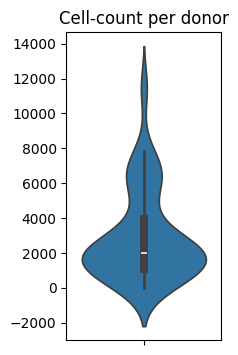

In [9]:
### By donor

donor = rna_obs.groupby(['donor']).size()

p(stats.describe(donor))

plt.figure(figsize=(2, 4))
sns.violinplot(donor)
plt.title(f"Cell-count per donor")

DescribeResult(nobs=6696, minmax=(0, 3471), mean=31.48999402628435, variance=39625.68712914111, skewness=9.65504395381348, kurtosis=114.7277585036272)


Text(0.5, 1.0, 'Cell-count per donor-batch')

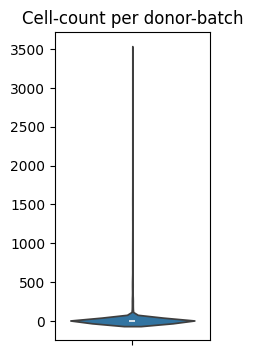

In [10]:
### By donor-batch

donor_batch = rna_obs.groupby(['donor', 'sample']).size()

p(stats.describe(donor_batch))

plt.figure(figsize=(2, 4))
sns.violinplot(donor_batch)
plt.title(f"Cell-count per donor-batch")

cell_type
DL-EN                 30210
Differentiating-RG     5280
Dividing-Glia         18012
Glia                  29117
IPC                   15313
Interneurons           8588
Interneurons-Prog      6338
Midbrain-EN           19332
UL-EN                 41200
immature-EN           37467
dtype: int64
DescribeResult(nobs=10, minmax=(5280, 41200), mean=21085.7, variance=165560128.6777778, skewness=0.24611660688158757, kurtosis=-1.2789562144946487)


Text(0.5, 1.0, 'Cell-count per cell-type')

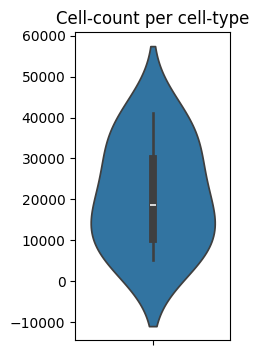

In [11]:
### By cell-type

ct = rna_obs.groupby(['cell_type']).size()

p(ct)
p(stats.describe(ct))

plt.figure(figsize=(2, 4))
sns.violinplot(ct)
plt.title(f"Cell-count per cell-type")

DescribeResult(nobs=720, minmax=(0, 3129), mean=292.8569444444444, variance=219275.9475177716, skewness=2.735906592623263, kurtosis=8.785055950385482)


Text(0.5, 1.0, 'Cell-count per ct-donor')

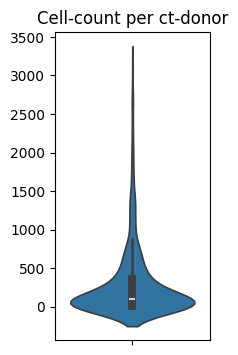

In [12]:
### By ct-donor

ct_donor = rna_obs.groupby(['donor', 'cell_type']).size()

p(stats.describe(ct_donor))

plt.figure(figsize=(2,4))
sns.violinplot(ct_donor)
plt.title(f"Cell-count per ct-donor")

DescribeResult(nobs=642, minmax=(1, 3129), mean=328.4376947040498, variance=234254.22154101115, skewness=2.58534918024752, kurtosis=7.774978284355161)


Text(0.5, 1.0, 'Cell-count per ct-donor')

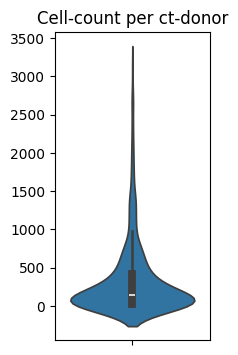

In [30]:
### By ct-donor: 0s removed

ct_donor = rna_obs.groupby(['donor', 'cell_type']).size()
ct_donor = ct_donor[ct_donor!= 0]

p(stats.describe(ct_donor))

plt.figure(figsize=(2,4))
sns.violinplot(ct_donor)
plt.title(f"Cell-count per ct-donor")

DescribeResult(nobs=930, minmax=(0, 2545), mean=226.7279569892473, variance=98803.84518096692, skewness=3.013035145618659, kurtosis=12.457464832386222)


Text(0.5, 1.0, 'Cell-count per ct-batch')

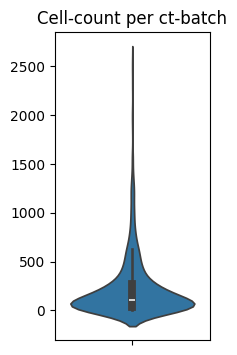

In [13]:
### By ct-batch (useful for HVPeaks assessment)

ct_batch = rna_obs.groupby(['sample', 'cell_type']).size()

p(stats.describe(ct_batch))

plt.figure(figsize=(2,4))
sns.violinplot(ct_batch)
plt.title(f"Cell-count per ct-batch")

DescribeResult(nobs=66960, minmax=(0, 1326), mean=3.148999402628435, variance=915.105996698875, skewness=17.272098495769022, kurtosis=410.46653942364236)


Text(0.5, 1.0, 'Cell-count per ct-donor-batch')

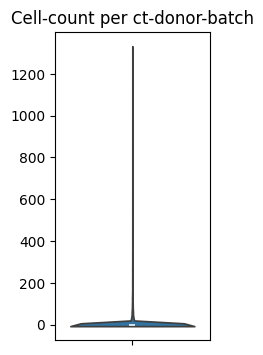

In [14]:
### By ct-donor-batch

ct_donor_batch = rna_obs.groupby(['donor', 'cell_type', 'sample']).size()

p(stats.describe(ct_donor_batch))

plt.figure(figsize=(2,4))
sns.violinplot(ct_donor_batch)
plt.title(f"Cell-count per ct-donor-batch")

DescribeResult(nobs=2812, minmax=(1, 1326), mean=74.98470839260312, variance=16409.647933995333, skewness=3.5603420768942886, kurtosis=17.66529961072126)


Text(0.5, 1.0, 'Cell-count per ct-donor-batch')

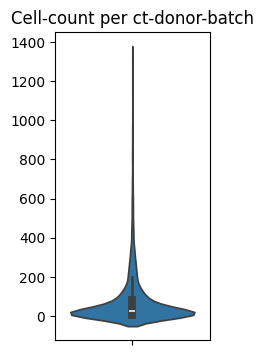

In [ ]:
### By ct-donor-batch: 0s removed

ct_donor_batch = rna_obs.groupby(['donor', 'cell_type', 'sample']).size()
ct_donor_batch = ct_donor_batch[ct_donor_batch!= 0]

p(stats.describe(ct_donor_batch))

plt.figure(figsize=(2,4))
sns.violinplot(ct_donor_batch)
plt.title(f"Cell-count per ct-donor-batch")

# 1 cell-type

==> Removed 0-count donors and samples

In [15]:
cell_type = 'UL-EN'

peaks_obs_1ct = rna_obs[rna_obs['cell_type'] == cell_type].copy()
peaks_obs_1ct['donor'] = peaks_obs_1ct['donor'].cat.remove_unused_categories()
peaks_obs_1ct['sample'] = peaks_obs_1ct['sample'].cat.remove_unused_categories()

DescribeResult(nobs=52, minmax=(1, 2857), mean=792.3076923076923, variance=648425.3936651583, skewness=1.0383384448100808, kurtosis=-0.057807220443486074)


Text(0.5, 1.0, 'Cell-count per donor\n- UL-EN -')

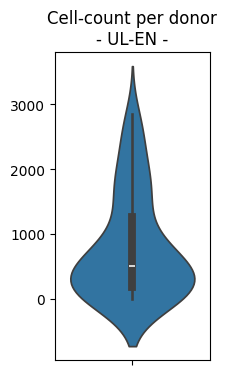

In [16]:
### By donor

donor_1ct = peaks_obs_1ct.groupby(['donor']).size()

p(stats.describe(donor_1ct))

plt.figure(figsize=(2,4))
sns.violinplot(donor_1ct)
plt.title(f"Cell-count per donor\n- {cell_type} -")

DescribeResult(nobs=4680, minmax=(0, 1326), mean=8.803418803418804, variance=3930.2947521477126, skewness=11.001051304973462, kurtosis=154.8698982025115)


Text(0.5, 1.0, 'Cell-count per donor-batch\n- UL-EN -')

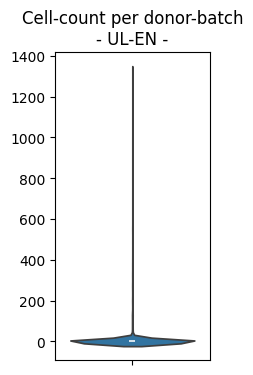

In [17]:
### By donor-batch

donor_1ct = peaks_obs_1ct.groupby(['donor', 'sample']).size()

p(stats.describe(donor_1ct))

plt.figure(figsize=(2,4))
sns.violinplot(donor_1ct)
plt.title(f"Cell-count per donor-batch\n- {cell_type} -")

# All cell-types

cell_type        DL-EN  Differentiating-RG  Dividing-Glia         Glia  \
count        72.000000           72.000000      72.000000    72.000000   
mean        419.583333           73.333333     250.166667   404.402778   
std         635.969654          104.122625     254.250237   429.522291   
min           0.000000            0.000000       0.000000     0.000000   
25%           3.750000            9.500000      86.000000    98.750000   
50%         141.500000           28.500000     152.000000   214.000000   
75%         550.750000           88.250000     317.750000   527.750000   
max        3129.000000          537.000000    1368.000000  1382.000000   

cell_type          IPC  Interneurons  Interneurons-Prog  Midbrain-EN  \
count        72.000000     72.000000          72.000000    72.000000   
mean        212.680556    119.277778          88.027778   268.500000   
std         298.786458    166.792628         136.971979   340.172036   
min           0.000000      0.000000         

Text(0, 0.5, '#')

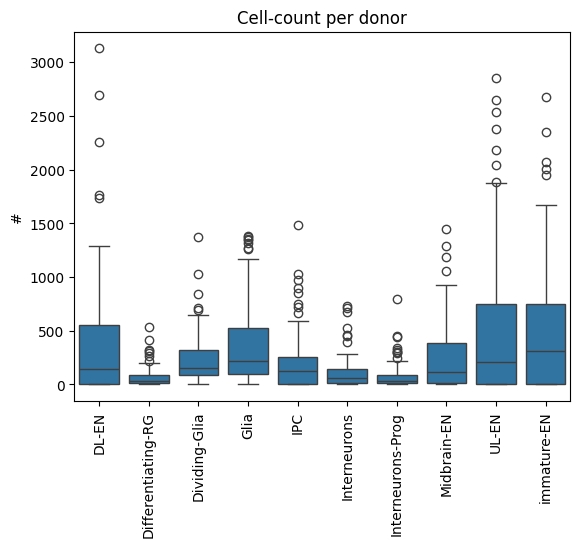

In [18]:
### By donor

donor_allcts = rna_obs.groupby(['cell_type', 'donor']).size().reset_index(level='cell_type')
donor_allcts_pivot = donor_allcts.pivot(columns='cell_type', values=0)

p(donor_allcts_pivot.describe())

sns.boxplot(data=donor_allcts, x='cell_type', y=0)
plt.xticks(rotation=90)
plt.title(f"Cell-count per donor")
plt.xlabel("")
plt.ylabel("#")

cell_type        DL-EN  Differentiating-RG  Dividing-Glia         Glia  \
count        66.000000           67.000000      70.000000    70.000000   
mean        457.727273           78.805970     257.314286   415.957143   
std         651.201813          105.948278     254.265726   430.071091   
min           1.000000            1.000000      20.000000     9.000000   
25%          10.750000           11.500000      90.500000   114.500000   
50%         240.000000           34.000000     154.500000   222.000000   
75%         556.750000           90.000000     333.250000   535.250000   
max        3129.000000          537.000000    1368.000000  1382.000000   

cell_type          IPC  Interneurons  Interneurons-Prog  Midbrain-EN  \
count        51.000000     69.000000          69.000000    69.000000   
mean        300.254902    124.463768          91.855072   280.173913   
std         316.144957    168.499745         138.680576   342.787619   
min           1.000000      1.000000         

Text(0, 0.5, '#')

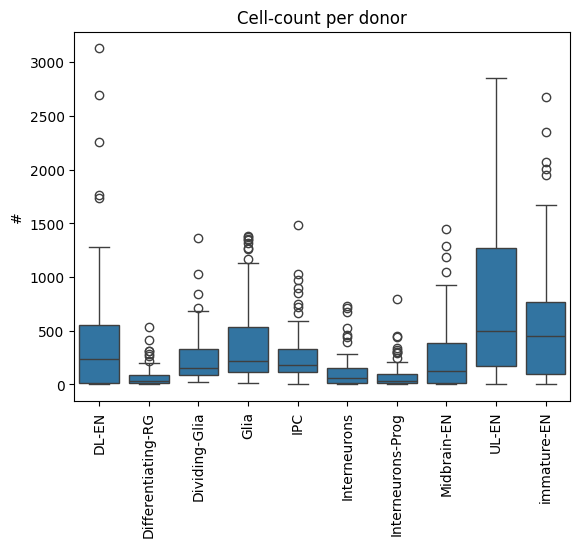

In [19]:
### By donor: 0s removed

donor_allcts = rna_obs.groupby(['cell_type', 'donor']).size().reset_index(level='cell_type')
donor_allcts = donor_allcts[~(donor_allcts[0] == 0)].copy()
donor_allcts_pivot = donor_allcts.pivot(columns='cell_type', values=0)

p(donor_allcts_pivot.describe())

sns.boxplot(data=donor_allcts, x='cell_type', y=0)
plt.xticks(rotation=90)
plt.title(f"Cell-count per donor")
plt.xlabel("")
plt.ylabel("#")

cell_type        DL-EN  Differentiating-RG  Dividing-Glia         Glia  \
count        93.000000           93.000000      93.000000    93.000000   
mean        324.838710           56.774194     193.677419   313.086022   
std         403.933736           66.425527     183.197634   329.000154   
min           0.000000            0.000000       9.000000     6.000000   
25%          64.000000           13.000000      86.000000    80.000000   
50%         182.000000           33.000000     143.000000   197.000000   
75%         438.000000           76.000000     249.000000   425.000000   
max        2010.000000          305.000000    1074.000000  1424.000000   

cell_type         IPC  Interneurons  Interneurons-Prog  Midbrain-EN  \
count       93.000000     93.000000          93.000000    93.000000   
mean       164.655914     92.344086          68.150538   207.870968   
std        174.138594    101.586277          96.219851   217.752963   
min          0.000000      0.000000           0.0

Text(0, 0.5, '#')

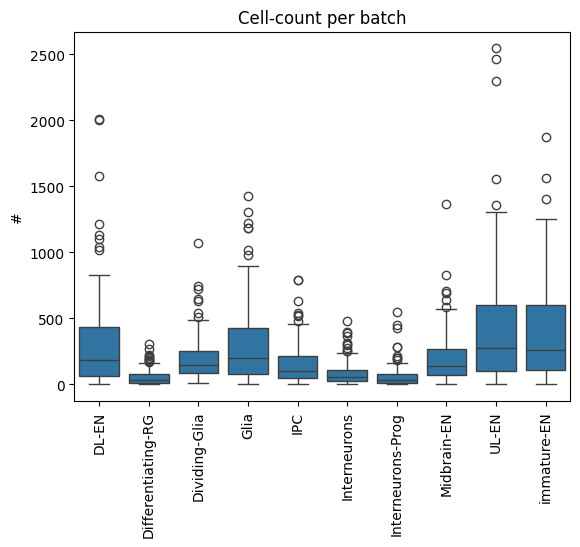

In [20]:
### By batch

batch_allcts = rna_obs.groupby(['cell_type', 'sample']).size().reset_index(level='cell_type')
batch_allcts_pivot = batch_allcts.pivot(columns='cell_type', values=0)

p(batch_allcts_pivot.describe())

sns.boxplot(data=batch_allcts, x='cell_type', y=0)
plt.xticks(rotation=90)
plt.title(f"Cell-count per batch")
plt.xlabel("")
plt.ylabel("#")

cell_type        DL-EN  Differentiating-RG  Dividing-Glia         Glia  \
count        92.000000           91.000000      93.000000    93.000000   
mean        328.369565           58.021978     193.677419   313.086022   
std         404.701483           66.612308     183.197634   329.000154   
min           1.000000            1.000000       9.000000     6.000000   
25%          64.000000           13.500000      86.000000    80.000000   
50%         183.000000           33.000000     143.000000   197.000000   
75%         439.750000           81.500000     249.000000   425.000000   
max        2010.000000          305.000000    1074.000000  1424.000000   

cell_type         IPC  Interneurons  Interneurons-Prog  Midbrain-EN  \
count       91.000000     91.000000          92.000000    93.000000   
mean       168.274725     94.373626          68.891304   207.870968   
std        174.305483    101.761666          96.480079   217.752963   
min          1.000000      1.000000           1.0

Text(0, 0.5, '#')

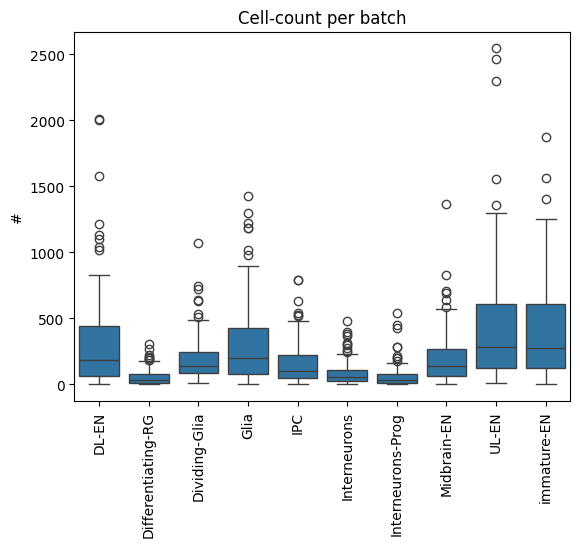

In [21]:
### By batch: 0s removed

batch_allcts = rna_obs.groupby(['cell_type', 'sample']).size().reset_index(level='cell_type')
batch_allcts = batch_allcts[~(batch_allcts[0] == 0)].copy()
batch_allcts_pivot = batch_allcts.pivot(columns='cell_type', values=0)

p(batch_allcts_pivot.describe())

sns.boxplot(data=batch_allcts, x='cell_type', y=0)
plt.xticks(rotation=90)
plt.title(f"Cell-count per batch")
plt.xlabel("")
plt.ylabel("#")

cell_type        DL-EN  Differentiating-RG  Dividing-Glia         Glia  \
count      6696.000000         6696.000000    6696.000000  6696.000000   
mean          4.511649            0.788530       2.689964     4.348417   
std          40.094573            6.711204      20.762408    33.293122   
min           0.000000            0.000000       0.000000     0.000000   
25%           0.000000            0.000000       0.000000     0.000000   
50%           0.000000            0.000000       0.000000     0.000000   
75%           0.000000            0.000000       0.000000     0.000000   
max        1165.000000          175.000000     675.000000   797.000000   

cell_type          IPC  Interneurons  Interneurons-Prog  Midbrain-EN  \
count      6696.000000   6696.000000        6696.000000  6696.000000   
mean          2.286888      1.282557           0.946535     2.887097   
std          19.677223     12.364162           9.448772    25.927407   
min           0.000000      0.000000         

Text(0.5, 1.0, 'Cell-count per donor-batch')

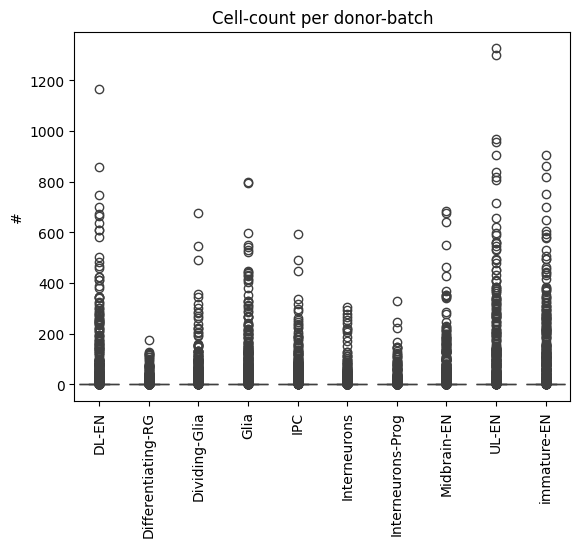

In [25]:
### By donor-batch:
donor_batch_allcts = rna_obs.groupby(['cell_type', 'donor', 'sample']).size().reset_index(level=['cell_type', 'sample', 'donor'])
donor_batch_allcts['donor_batch'] = donor_batch_allcts['donor'].astype(str) + "_" + donor_batch_allcts['sample'].astype(str)
donor_batch_allcts = donor_batch_allcts[['cell_type', 0, 'donor_batch']].set_index('donor_batch')
donor_batch_allcts

donor_batch_allcts_pivot = donor_batch_allcts.pivot(columns='cell_type', values=0)

p(donor_batch_allcts_pivot.describe())

sns.boxplot(data=donor_batch_allcts, x='cell_type', y=0)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("#")
plt.title(f"Cell-count per donor-batch")

cell_type        DL-EN  Differentiating-RG  Dividing-Glia        Glia  \
count       277.000000          287.000000     376.000000  358.000000   
mean        109.061372           18.397213      47.904255   81.332402   
std         165.987012           27.004967      74.326569  120.449781   
min           1.000000            1.000000       1.000000    1.000000   
25%           5.000000            2.000000      10.000000   10.000000   
50%          38.000000            7.000000      24.000000   35.000000   
75%         143.000000           21.000000      55.000000  100.750000   
max        1165.000000          175.000000     675.000000  797.000000   

cell_type         IPC  Interneurons  Interneurons-Prog  Midbrain-EN  \
count      226.000000    278.000000         277.000000   278.000000   
mean        67.756637     30.892086          22.880866    69.539568   
std         84.056056     52.696076          40.767326   107.684139   
min          1.000000      1.000000           1.000000    

Text(0.5, 1.0, 'Cell-count per donor-batch')

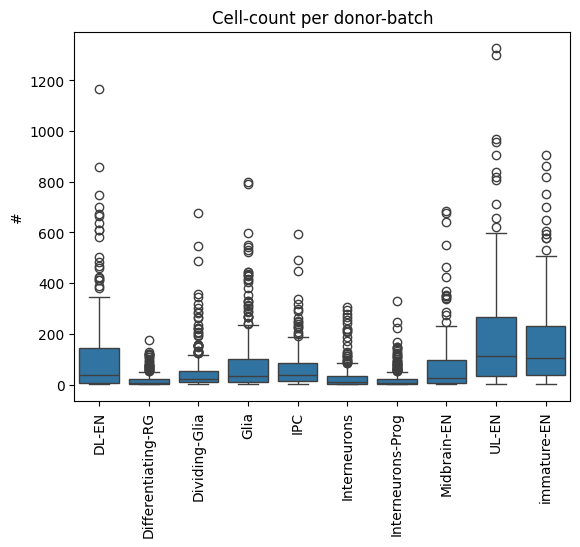

In [26]:
### By donor-batch: 0s removed

donor_batch_allcts = rna_obs.groupby(['cell_type', 'donor', 'sample']).size().reset_index(level=['cell_type', 'sample', 'donor'])
donor_batch_allcts = donor_batch_allcts[~(donor_batch_allcts[0] == 0)].copy()
donor_batch_allcts['donor_batch'] = donor_batch_allcts['donor'].astype(str) + "_" + donor_batch_allcts['sample'].astype(str)
donor_batch_allcts = donor_batch_allcts[['cell_type', 0, 'donor_batch']].set_index('donor_batch')
donor_batch_allcts

donor_batch_allcts_pivot = donor_batch_allcts.pivot(columns='cell_type', values=0)

p(donor_batch_allcts_pivot.describe())

sns.boxplot(data=donor_batch_allcts, x='cell_type', y=0)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("#")
plt.title(f"Cell-count per donor-batch")